<a href="https://colab.research.google.com/github/shachi-i/Celestial-intellgiance/blob/main/Celestial_intellgiance_pulsar_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("HTRU_2.csv")

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10850 entries, 0 to 10849
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   140.5625      10850 non-null  float64
 1   55.68378214   10850 non-null  float64
 2   -0.234571412  10850 non-null  float64
 3   -0.699648398  10850 non-null  float64
 4   3.199832776   10850 non-null  float64
 5   19.11042633   10849 non-null  float64
 6   7.975531794   10849 non-null  float64
 7   74.24222492   10849 non-null  float64
 8   0             10849 non-null  float64
dtypes: float64(9)
memory usage: 763.0 KB
None


In [ ]:
print(df.describe())

           140.5625   55.68378214  -0.234571412  -0.699648398   3.199832776  \
count  10850.000000  10850.000000  10850.000000  10850.000000  10850.000000   
mean     109.397966     46.308217      0.557718      2.173660     13.730846   
std       27.372837      7.079251      1.182262      6.883228     30.774091   
min        5.812500     24.772042     -1.669032     -1.791886      0.213211   
25%       99.390625     42.028677      0.034359     -0.176496      1.996656   
50%      114.355469     46.707671      0.235677      0.227597      2.925585   
75%      126.515625     50.940951      0.507908      1.066191      6.313545   
max      190.421875     98.778911      8.069522     68.101622    223.392141   

        19.11042633   7.975531794   74.24222492             0  
count  10849.000000  10849.000000  10849.000000  10849.000000  
mean      27.415249      8.007568     98.452846      0.119642  
std       19.857578      4.465607    101.289547      0.324558  
min        7.370432     -3.13927

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 140.5625        0
55.68378214     0
-0.234571412    0
-0.699648398    0
3.199832776     0
19.11042633     1
7.975531794     1
74.24222492     1
0               1
dtype: int64


In [ ]:
df.head()

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0.0


In [ ]:

columns = [
    "Mean_IP", "Std_IP", "ExcessKurt_IP", "Skewness_IP",
    "Mean_DM", "Std_DM", "ExcessKurt_DM", "Skewness_DM",
    "Label"
]
df = pd.read_csv("HTRU_2.csv", header=None, names=columns)
print("Missing values:\n", df.isnull().sum())
df.head()

Missing values:
 Mean_IP          0
Std_IP           0
ExcessKurt_IP    0
Skewness_IP      0
Mean_DM          0
Std_DM           1
ExcessKurt_DM    1
Skewness_DM      1
Label            1
dtype: int64


,Mean_IP,Std_IP,ExcessKurt_IP,Skewness_IP,Mean_DM,Std_DM,ExcessKurt_DM,Skewness_DM,Label
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0


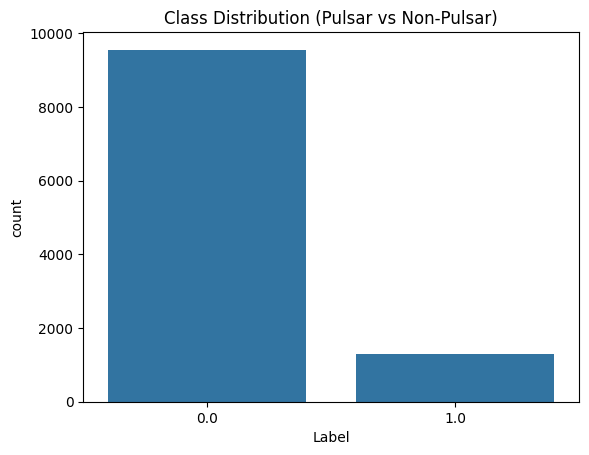

,count
Label,
0.0,9552
1.0,1298


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x=df["Label"])
plt.title("Class Distribution (Pulsar vs Non-Pulsar)")
plt.show()


df["Label"].value_counts()


Since the dataset is highly imbalaced, it might lead to a bias. So we

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and labels
X = df.drop(columns=["Label"])
y = df["Label"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Label"] = y_resampled

# Verify new class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_resampled["Label"])
plt.title("Balanced Class Distribution After SMOTE")
plt.show()

# Print exact counts
df_resampled["Label"].value_counts()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

Fourier Transform Features (Frequency Analysis)

In [ ]:
import numpy as np


df["FFT_Mean_IP"] = np.abs(np.fft.fft(df["Mean_IP"]))
df["FFT_Mean_DM"] = np.abs(np.fft.fft(df["Mean_DM"]))


df["FFT_Max_IP"] = df["FFT_Mean_IP"].apply(lambda x: np.max(x))
df["FFT_Max_DM"] = df["FFT_Mean_DM"].apply(lambda x: np.max(x))

df["FFT_Mean_IP"] = df["FFT_Mean_IP"].apply(lambda x: np.mean(x))
df["FFT_Mean_DM"] = df["FFT_Mean_DM"].apply(lambda x: np.mean(x))


df.drop(columns=["FFT_Mean_IP", "FFT_Mean_DM"], inplace=True)

df.head()


,Mean_IP,Std_IP,ExcessKurt_IP,Skewness_IP,Mean_DM,Std_DM,ExcessKurt_DM,Skewness_DM,Label,FFT_Max_IP,FFT_Max_DM
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0,1.187108e+06,148982.873747
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0,1.705457e+04,21774.463329
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0,1.511407e+04,7745.458099
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0,9.641422e+03,15044.261117
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0,8.124923e+03,9559.030873


Wavelet Transform Features (Time-Frequency Analysis)

In [ ]:
!pip install PyWavelets
import pywt
import numpy as np

def extract_wavelet_features(signal):
    # Convert the signal to a numpy array to ensure it has dimensions
    signal = np.array(signal)

    # If signal has more than one element, apply wavedec
    if signal.size > 1:
        coeffs = pywt.wavedec(signal, 'db4', level=3)  # Decomposing using Daubechies wavelet
        cA3, cD3, cD2, cD1 = coeffs  # Approximate and Detail Coefficients
        return np.mean(cA3), np.std(cD1), np.max(cD2)
    # If signal has only one element, return NaN for wavelet features
    else:
        return np.nan, np.nan, np.nan

# Apply wavelet transform on key signal features
df["Wavelet_Mean_IP"], df["Wavelet_Std_IP"], df["Wavelet_Max_IP"] = zip(*df["Mean_IP"].apply(extract_wavelet_features))
df["Wavelet_Mean_DM"], df["Wavelet_Std_DM"], df["Wavelet_Max_DM"] = zip(*df["Mean_DM"].apply(extract_wavelet_features))

df.head()

,Mean_IP,Std_IP,ExcessKurt_IP,Skewness_IP,Mean_DM,Std_DM,ExcessKurt_DM,Skewness_DM,Label,FFT_Max_IP,FFT_Max_DM,Wavelet_Mean_IP,Wavelet_Std_IP,Wavelet_Max_IP,Wavelet_Mean_DM,Wavelet_Std_DM,Wavelet_Max_DM
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0,1.187108e+06,148982.873747,NaN,NaN,NaN,NaN,NaN,NaN
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0,1.705457e+04,21774.463329,NaN,NaN,NaN,NaN,NaN,NaN
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0,1.511407e+04,7745.458099,NaN,NaN,NaN,NaN,NaN,NaN
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0,9.641422e+03,15044.261117,NaN,NaN,NaN,NaN,NaN,NaN
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0,8.124923e+03,9559.030873,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df["DM_Approx"] = df["Mean_DM"] / (df["Std_DM"] + 1e-5)  # Adding small value to avoid division by zero
df.head()


,Mean_IP,Std_IP,ExcessKurt_IP,Skewness_IP,Mean_DM,Std_DM,ExcessKurt_DM,Skewness_DM,Label,FFT_Max_IP,FFT_Max_DM,Wavelet_Mean_IP,Wavelet_Std_IP,Wavelet_Max_IP,Wavelet_Mean_DM,Wavelet_Std_DM,Wavelet_Max_DM,DM_Approx
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0,1.187108e+06,148982.873747,NaN,NaN,NaN,NaN,NaN,NaN,0.167439
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0,1.705457e+04,21774.463329,NaN,NaN,NaN,NaN,NaN,NaN,0.112869
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0,1.511407e+04,7745.458099,NaN,NaN,NaN,NaN,NaN,NaN,0.143540
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0,9.641422e+03,15044.261117,NaN,NaN,NaN,NaN,NaN,NaN,0.173812
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0,8.124923e+03,9559.030873,NaN,NaN,NaN,NaN,NaN,NaN,0.102795


In [ ]:
print(df.columns)


Index(['Mean_IP', 'Std_IP', 'ExcessKurt_IP', 'Skewness_IP', 'Mean_DM',
       'Std_DM', 'ExcessKurt_DM', 'Skewness_DM', 'Label', 'FFT_Max_IP',
       'FFT_Max_DM', 'Wavelet_Mean_IP', 'Wavelet_Std_IP', 'Wavelet_Max_IP',
       'Wavelet_Mean_DM', 'Wavelet_Std_DM', 'Wavelet_Max_DM', 'DM_Approx'],
      dtype='object')


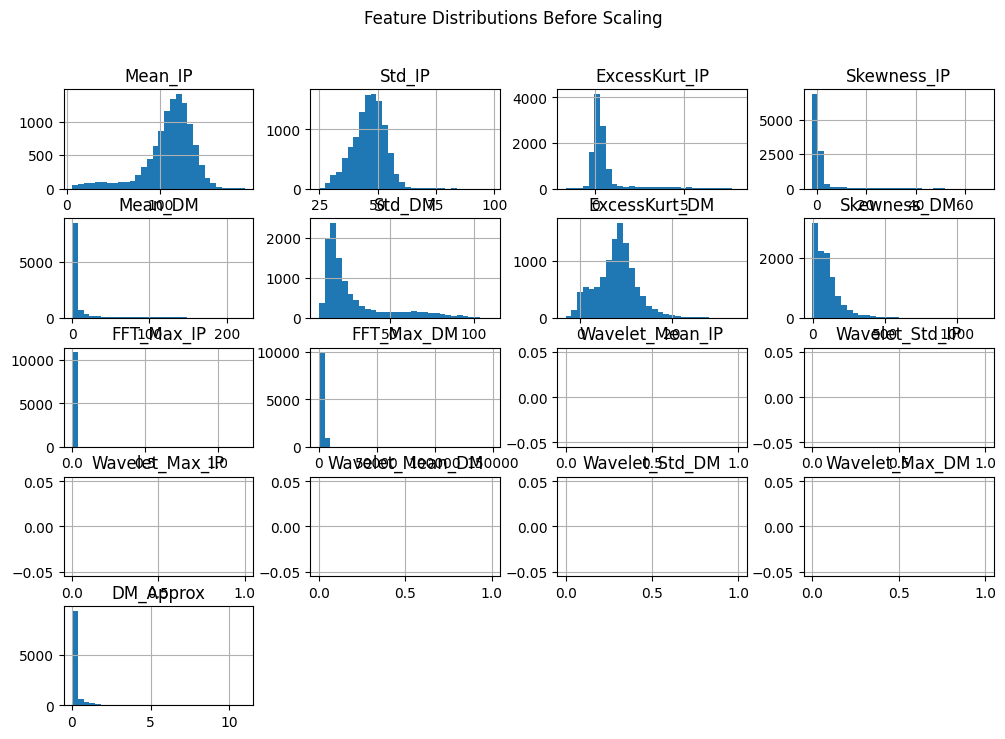

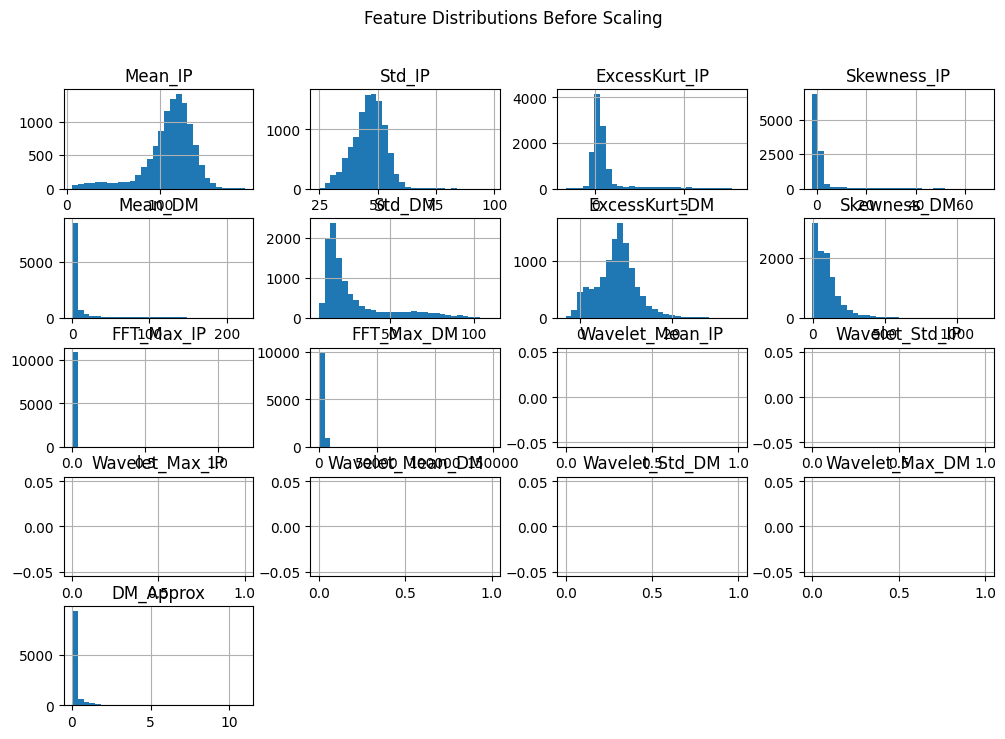

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Load your dataset
df = df.drop(columns=["Label"])  # Drop label for scaling

# Visualizing distributions before scaling
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions Before Scaling")
plt.show()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Load your dataset
#df = df.drop(columns=["Label"])  # Drop label for scaling

# Visualizing distributions before scaling
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions Before Scaling")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
<ipython-input-15-8dc9852911ea>:23: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scaled_df.hist(ax=axes[i], bins=30)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(num

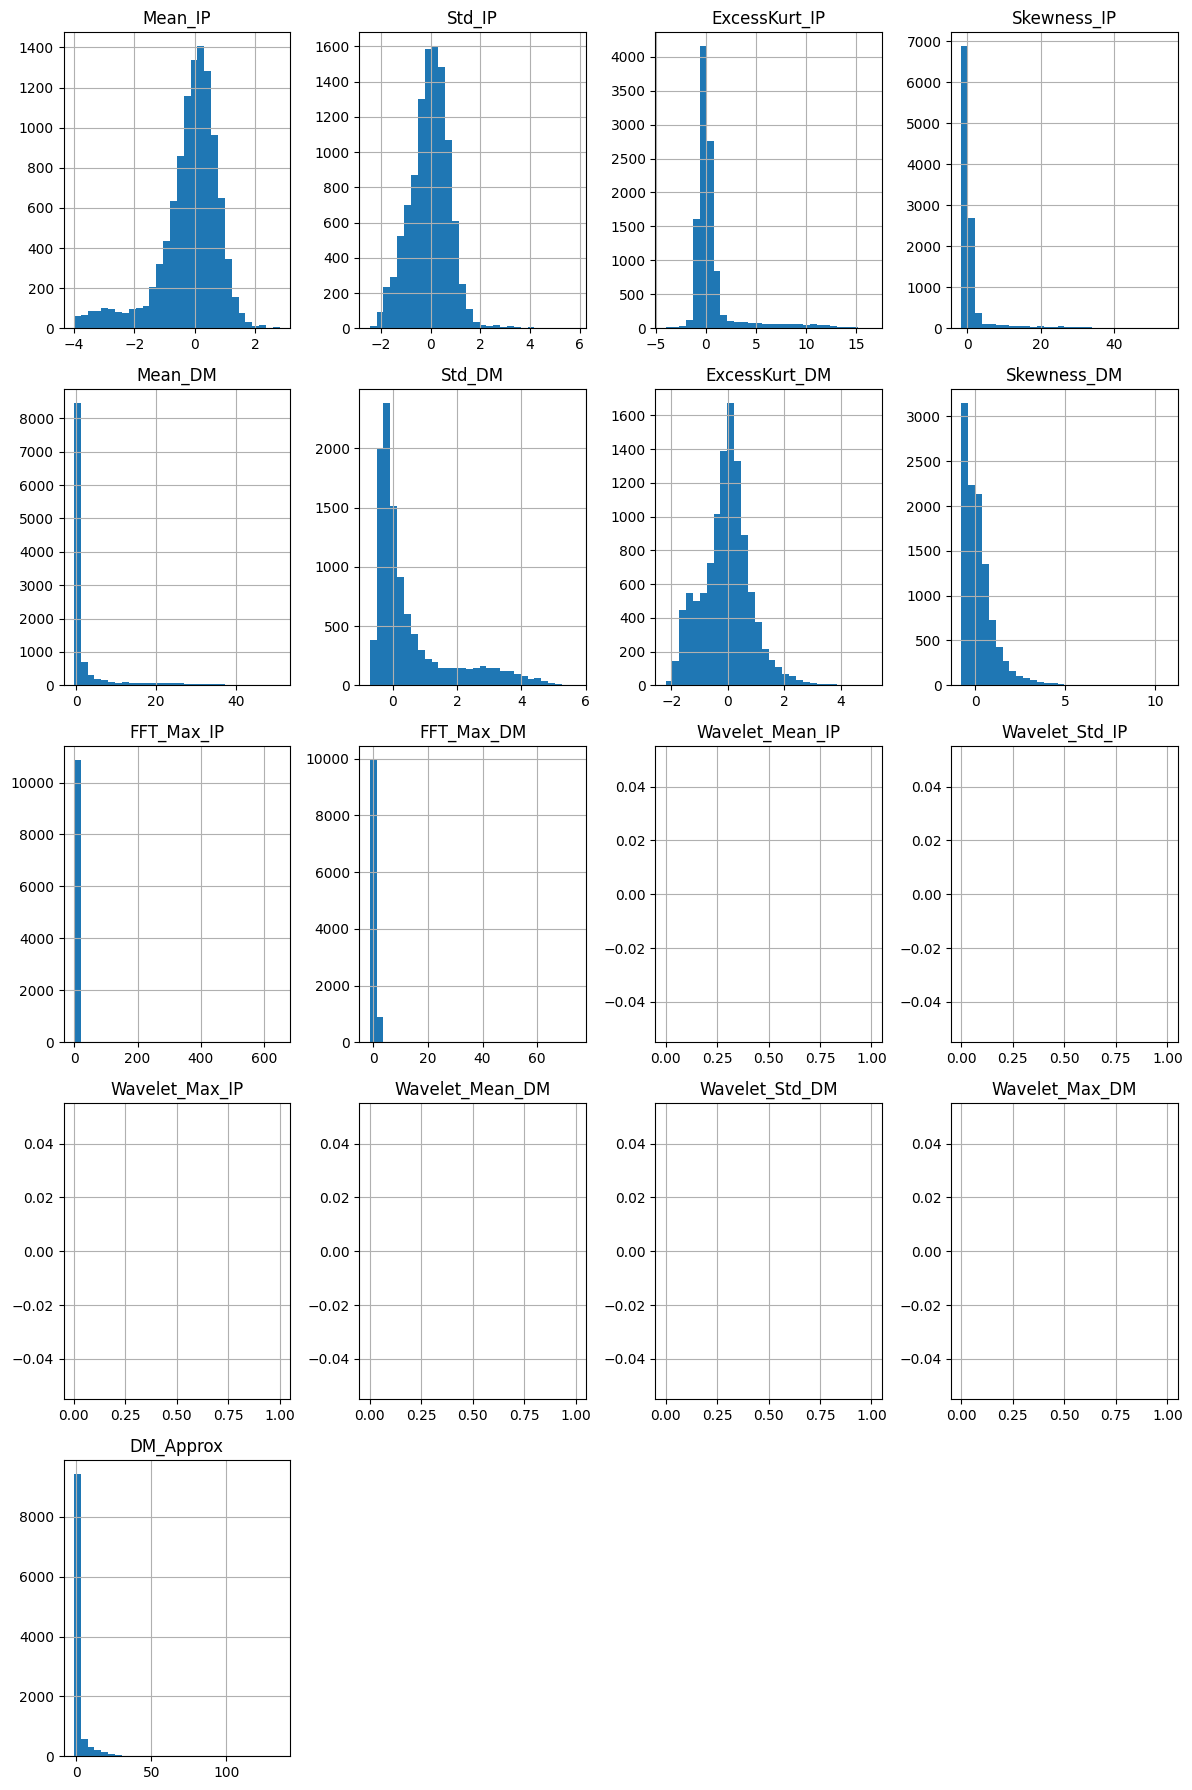

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


df_features = df


scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

for i, (scaler_name, scaler) in enumerate(scalers.items()):
    scaled_data = scaler.fit_transform(df_features)  # Scale the data
    scaled_df = pd.DataFrame(scaled_data, columns=df_features.columns)


    scaled_df.hist(ax=axes[i], bins=30)
    axes[i].set_title(f"Feature Distributions After {scaler_name}", fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split


original_df = pd.read_csv("HTRU_2.csv", header=None, names=columns)
y = original_df['Label']
X = scaled_df


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [10851, 17898]

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


print(classification_report(y_test, y_pred))


In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [ ]:

y = original_df['Label']
X = scaled_df


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)


xgb_model.fit(X_train, y_train)


In [ ]:

y_pred = xgb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.2f}")


print(classification_report(y_test, y_pred))


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense


X_train_seq = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_seq = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_seq, y_train, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test))


In [ ]:

y_pred = (model.predict(X_test_seq) > 0.5).astype("int32")


from sklearn.metrics import accuracy_score, classification_report
print(f"LSTM Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np


y_pred_lstm = np.round(y_probs)  +++

plt.figure(figsize=(8, 5))
plt.plot(y_test[:100], label="Actual", marker='o')
plt.plot(y_pred_lstm[:100], label="Predicted", marker='x', linestyle='dashed')
plt.title("LSTM Predictions vs Actual Values (Before Tuning)")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.show()
+

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

# Plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("XGBoost Confusion Matrix")

sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title("LSTM Confusion Matrix")

plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming y_probs should be the output from the LSTM model
y_probs = model.predict(X_test_seq)
y_pred_lstm = np.round(y_probs)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

# Plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("XGBoost Confusion Matrix")

sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title("LSTM Confusion Matrix")

plt.show()

In [ ]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)


In [ ]:
from flask import Flask, request, jsonify
import numpy as np

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['features']
    prediction = model.predict(np.array(data).reshape(1, -1))
    result = int(prediction[0] > 0.5)  # Convert probability to binary
    return jsonify({'pulsar': result})

if __name__ == '__main__':
    app.run(debug=True)
